SNR=0dB


  0%|          | 0/5 [00:00<?, ?it/s]c:\Users\Nolan\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_peak_finding.py:261: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)
100%|██████████| 5/5 [00:29<00:00,  5.97s/it]


SNR=1dB


100%|██████████| 5/5 [00:32<00:00,  6.41s/it]


SNR=2dB


100%|██████████| 5/5 [00:32<00:00,  6.47s/it]


SNR=3dB


100%|██████████| 5/5 [00:29<00:00,  5.99s/it]


SNR=4dB


100%|██████████| 5/5 [00:29<00:00,  5.85s/it]


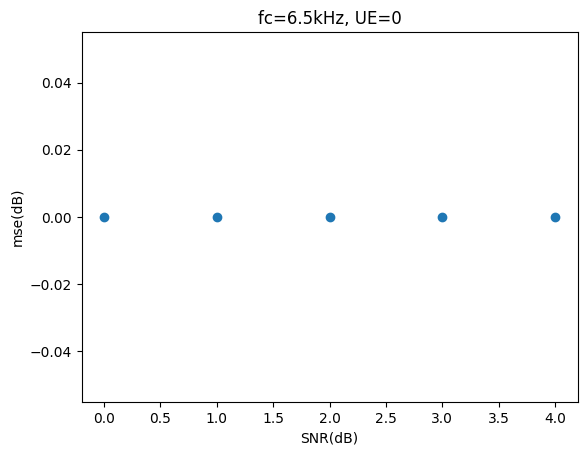

In [1]:
from bf_multichannel import bf_multichannel
from tx_gnb_sim import tx_gnb_sim
import numpy as np
import matplotlib.pyplot as plt

# fc = 6.5kHz
n_UE = 1 # 2
# n_path = 2?
My_bf = bf_multichannel(6.5e3, 2, 5,n_UE)
# rx at (0,0)
# tx_1 at (5,5) and (7.5,5) with a wall at x=10
# after relection, tx_2 at (15,5) and (12.5,5)
My_bf.reflection_list = np.array([1,0.5]) # what does reflection_list accomplish?
My_bf.x_tx_list = np.array([5,15])
My_bf.y_tx_list = np.array([5,5])
#My_bf.reflection_list = np.array([1,0.5]) # what does reflection_list accomplish?
#My_bf.x_tx_list = np.array([5,15,7.5,12.5])
#My_bf.y_tx_list = np.array([5,5,5,5])

# rethink with this math

theta = My_bf.simulation()

My_ue = tx_gnb_sim(6.5e3, 2, 5, theta)
# do not assume independence
My_ue.reflection_list = np.array([1,0.5])
#My_ue.x_tx_list = np.array([5,15]) #shouldn't need to touch gnb location
#My_ue.y_tx_list = np.array([5,5]) #shouldn't need to touch gnb location
My_ue.x_rx_list = My_bf.x_tx_list
My_ue.y_rx_list = My_bf.y_tx_list

# plt mean square error
print(theta)
for i_UE in range(0,n_UE):
    plt.figure(i_UE)
    plt.plot(My_ue.snr_list, My_ue.mean_mse[:,i_UE], 'o')
    plt.xlabel('SNR(dB)')
    plt.ylabel('mse(dB)')
    plt.title(f'fc={My_bf.fc/1000:.1f}kHz, UE={i_UE}')

plt.show()